# Types of Naive Bayes algorithm
- Gaussian Naïve Bayes
- Multinomial Naïve Bayes
- Bernoulli Naïve Bayes

## Coding from scrath

Source of dataset: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset

In [74]:
# Numerical library
import numpy as np

# DataScience library
import pandas as pd

# Show the chards
import matplotlib.pyplot as plt

# Create the heatmap
import seaborn as sns

from IPython.display import Image

## Dataset

In [75]:
data = pd.read_csv(r'C:\Users\usuario\Documents\Nicole\Upwork\Breast_cancer_data.csv')
# obs: Be carefull putting the "r" before your file path or it could return an error.
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [76]:
# number of features = 5 (mean_radius,	mean_texture,	mean_perimeter,	mean_area,	mean_smoothness)
# diagnosis: Negative (0), Positive (1)

# We will predict if the pacient has or not the breast cancer.

<AxesSubplot: >

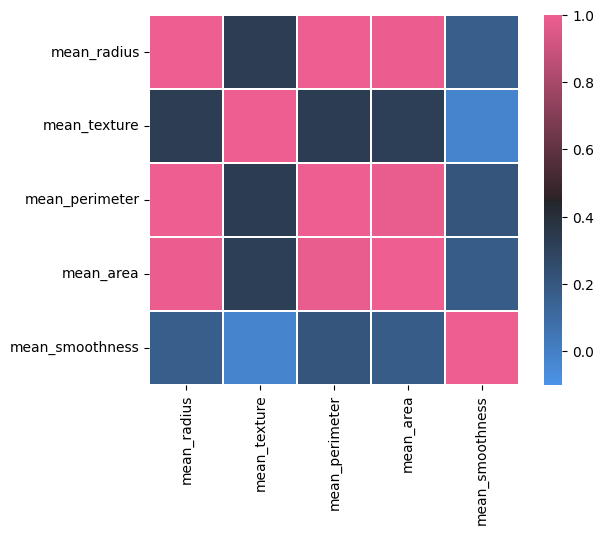

In [77]:
# Plotting a heat map the see the correlation between the features and the result
# Remember that the Naive-Bayes method it's a method where the features are independent.

# "data" is the DataFrame containing the data we set previously, where the last columns are the classes/targets
# "person" is a correlation method
corr = data.iloc[:,:-1].corr(method = "pearson")

# Define the color palette for the heatmap
# The color palette will be used to represent different levels of correlation
cmap = sns.diverging_palette(250, 354, 80, 60, center = 'dark', as_cmap = True) 


# Plot the heatmap of the correlation matrix
sns.heatmap(corr, vmax=1, vmin=-.1, cmap=cmap, square=True, linewidth=.2)

## Analysis
You can see from the graph that there are correlated values, given by the pink color, and the value "1". And that makes sense, because "radius" and "area" really are correlated. 
However, as our dataset can't have correlated values, since it's the Naive-Bayes method, we'll have to choose one of the data points to keep and remove the others.
Let's keep "Mean_radius, mean_texture, mean_smoothness, diagnosis".

In [78]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


## Normal distribution

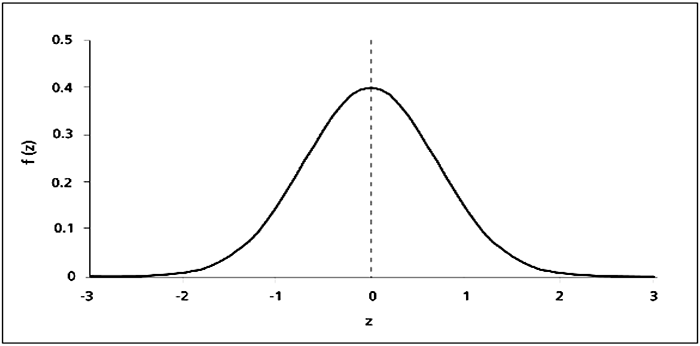

In [79]:
Image(filename=r'C:\Users\usuario\Documents\Nicole\Upwork\normaldistribution.png') 

A "normal" or Gaussian distribution is a graphical distribution where the graph will be symmetrical on both sides of the mean value. 
We will check whether our data is distributed in this way and whether we can apply the normal distribution method. 

<AxesSubplot: xlabel='mean_texture', ylabel='Count'>

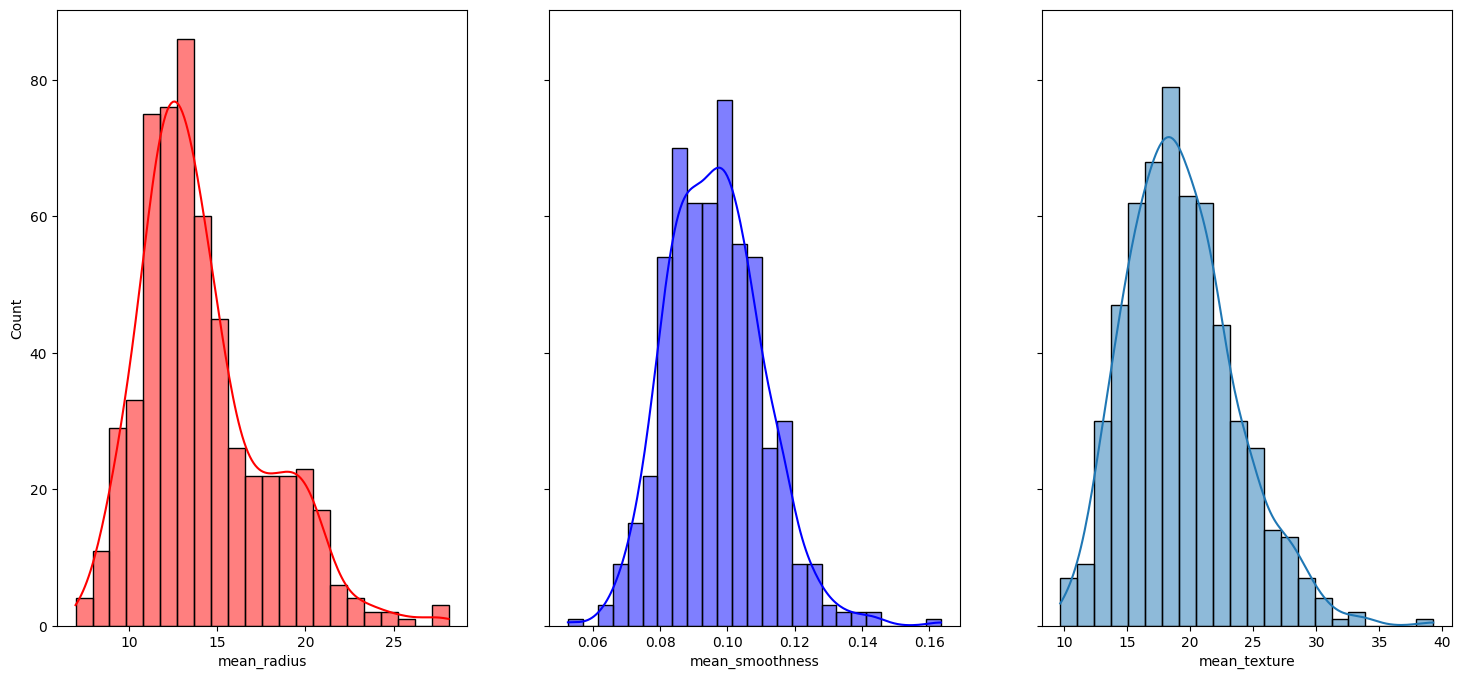

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18,8), sharey= True)

# Plotagem dos histogramas
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)



# The theory with the code:
$ X = (x_{0} , x_{1}, x_{2}) , Y \epsilon \{ 0,1 \} $

$ P(Y|X) = \frac{P(X = x_{0}, x_{1}, x_{2}|Y=y) * P(Y=y)}{P(X)} $


We have to find the value of y that maximize the $ P(Y=y|X) $


## Calculate P(Y=y) for all possible y

In [81]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior


# len(df[df[Y]==i] is the number of samples in df[Y], divided by the total number of samples. 

## Approach 1: Calculate P(X=x | Y=y) using Gaussian distribution

This approach, is the likelihood, where all the x(i) are independent. 
Here, the $ P(X = (x_{0} , x_{1}, x_{2}) | Y = y) $ is given by the product of: 
$ P(X=x_{0}| Y = y) * P(X=x_{1}| Y = y) * P(X=x_{2}| Y = y) $

In [82]:
def calculate_likelihood_gaussin(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]

    #Here we set the normal distribution
    mean, std = df[feat_name].mean(), df[feat_name].std()
    #The formula of probability density function of normal distribution
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2)))
    return p_x_given_y

feat = list(df.columns): This gets a list of the column names of the DataFrame df.

df = df[df[Y]==label]: This filters the DataFrame to keep only the rows where the Y class column has the value label. In other words, we are only considering the samples that belong to the specific class we are analyzing.

mean, std = df[feat_name].mean(), df[feat_name].std(): This calculates the mean (mean) and standard deviation (std) of the resource value (feat_name) for the samples belonging to the specified class.

(1 / (np.sqrt(2* np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2* std**2)): This is the formula for calculating the probability of a feat_val value given that the class is label, assuming a Gaussian distribution. The formula represents the probability density function (PDF) of a normal distribution.

$\frac{1}{\sqrt{2 \pi} \cdot \text{std}} \cdot e^{-\frac{(x - \text{mean})^2}{2 \cdot \text{std}^2}} $

return p_x_given_y: Returns the calculated probability of a feat_val resource value given that the class is label, assuming a Gaussian distribution.

## Calculate P(X = x1 | Y = y)P(X = x2 | Y = y)...P(X = xn | Y = y) * P(Y=y) for all y find the maxium 

In [83]:
def naive_bayes_gaussian(df, X, Y):
    #get features names
    features = list(df.columns)[:-1]

    # Calculate prior probabilities
    prior = calculate_prior(df , Y)

    Y_pred = []

    #loop over every data sample
    for x in X:
        #calculate likelihood
        labels = sorted(list(df[Y].unique())) # Get unique classes
        likelihood = [1]*len(labels)
        for j in range(len(labels)): # Initialize list of likelihoods for each class
            for i in range(len(features)):
                # Multiply likelihood of each feature for each class
                likelihood[j] *= calculate_likelihood_gaussin(df, features[i], x[i], Y, labels[j])

        #calculate posterior probability (numerator only)
        post_prob = [1]*len(labels) # Initialize list of posterior probabilities for each class
        for j in range(len(labels)):
            post_prob[j]= likelihood[j] * prior[j]
            
        # Add the class with highest probability as the prediction for the current sample
        Y_pred.append(np.argmax(post_prob))
        
    return np.array(Y_pred)

## Test Gaussian model

In [84]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train, test = train_test_split(data, test_size = .2, random_state=41)

# Extract features and labels from the testing set
X_test = test.iloc[:, :-1].values # Extract features, excluding the last column (class)
Y_test = test.iloc[:, -1].values  # Extract labels, taking only the last column (class)
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Use the Gaussian Naive Bayes model to predict labels for the testing set
from sklearn.metrics import confusion_matrix, f1_score

# Print the confusion matrix to evaluate the performance of the model
print(confusion_matrix(Y_test, Y_pred))
# Compute the F1 score to evaluate the model's accuracy
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


Just to understand the confusion matrix:
[[36 4]
 [0  74]]

It means we have: 36 = Correct positives, 4 = False positives, 0 = False negatives, 74 = Correct negatives.
This is something important to look at. Because this means that 4 people would receive a positive diagnosis for cancer, even though they don't have it, so they could start treatment without having the disease. In this case, it would be important to improve the model so that this number is equal to 0.

## Convert continuos features to categorical features

In [87]:
# Create categorical features based on binning of continuous features
# bins are the number of equally spaced categories
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins= 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins= 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins= 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
# Rearrange the columns to put the new categorical features first, followed by the diagnosis column
data = data[["cat_mean_radius", "cat_mean_texture", "cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


## Approach 2: Calculate P(X=x | Y = y) categorically

In [88]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y] == label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X = x1 | Y = y)P(X = x2 | Y = y)...P(X = xn | Y = y) * P(Y=y) for all y find the maxium 

In [89]:
def naive_bayes_gaussian(df, X, Y):
    #get features names
    features = list(df.columns)[:-1]

    # Calculate prior probabilities
    prior = calculate_prior(df , Y)

    Y_pred = []

    #loop over every data sample
    for x in X:
        #calculate likelihood
        labels = sorted(list(df[Y].unique())) # Get unique classes
        likelihood = [1]*len(labels)
        
        for j in range(len(labels)): # Initialize list of likelihoods for each class
            for i in range(len(features)):
                # Multiply likelihood of each feature for each class
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        #calculate posterior probability (numerator only)
        post_prob = [1]*len(labels) # Initialize list of posterior probabilities for each class
        for j in range(len(labels)):
            post_prob[j]= likelihood[j] * prior[j]
            
        # Add the class with highest probability as the prediction for the current sample
        Y_pred.append(np.argmax(post_prob))
        
    return np.array(Y_pred)

## Test categorical Model

In [90]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train, test = train_test_split(data, test_size = .2, random_state=41)

# Extract features and labels from the testing set
X_test = test.iloc[:, :-1].values # Extract features, excluding the last column (class)
Y_test = test.iloc[:, -1].values  # Extract labels, taking only the last column (class)
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Use the Gaussian Naive Bayes model to predict labels for the testing set
from sklearn.metrics import confusion_matrix, f1_score

# Print the confusion matrix to evaluate the performance of the model
print(confusion_matrix(Y_test, Y_pred))
# Compute the F1 score to evaluate the model's accuracy
print(f1_score(Y_test, Y_pred))

[[38  2]
 [ 5 69]]
0.9517241379310345


This shows us that this format is weaker than the previous one, showing that the Gaussian distribution worked better than categorization.